In [2]:
%matplotlib inline
from marketdata import *
from model import *
from analytics import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Load data 


In [3]:
FundAUM=1e6

In [4]:
mkts=get_market_list()
curr_px=get_most_liquid_price(mkts)
df=pd.DataFrame()
for m in mkts:
    df[m]=get_timeseries(m)

# Expirimenting using knn type of model to the portfolio
* One idea can be to input many different versions of the TSMOM model
* It's the same story as I've been mentioning

In [25]:
def ewma_mom_signal(data,short_lookback,long_lookback,vol_lookback=20):
    mul=get_contract_multipliers()
    signal=signal=pd.ewma(data,short_lookback)-pd.ewma(data,long_lookback)
    zscore= calc_zscore(signal,long_lookback)
    return zscore.shift(1)

In [22]:
def signal_daily(data,signal_lookback):
    mul=get_contract_multipliers()[data.columns]
    signal=pd.rolling_mean(data,signal_lookback)
    signal = signal /abs(signal)
    return signal.shift(1)

In [48]:
sig_fast= ewma_mom_signal(df[mkts],10,20)
sig_slow=ewma_mom_signal(df[mkts],50,150)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=0,adjust=True,com=10).mean()
  app.launch_new_instance()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=0,adjust=True,com=20).mean()
  app.launch_new_instance()
model.py:44: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=40,adjust=True,com=20).std(bias=False)
  return (signal/pd.ewmstd(signal,lookback,min_periods=lookback*2))
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: pd.ewm_mean is deprecated for DataFrame a

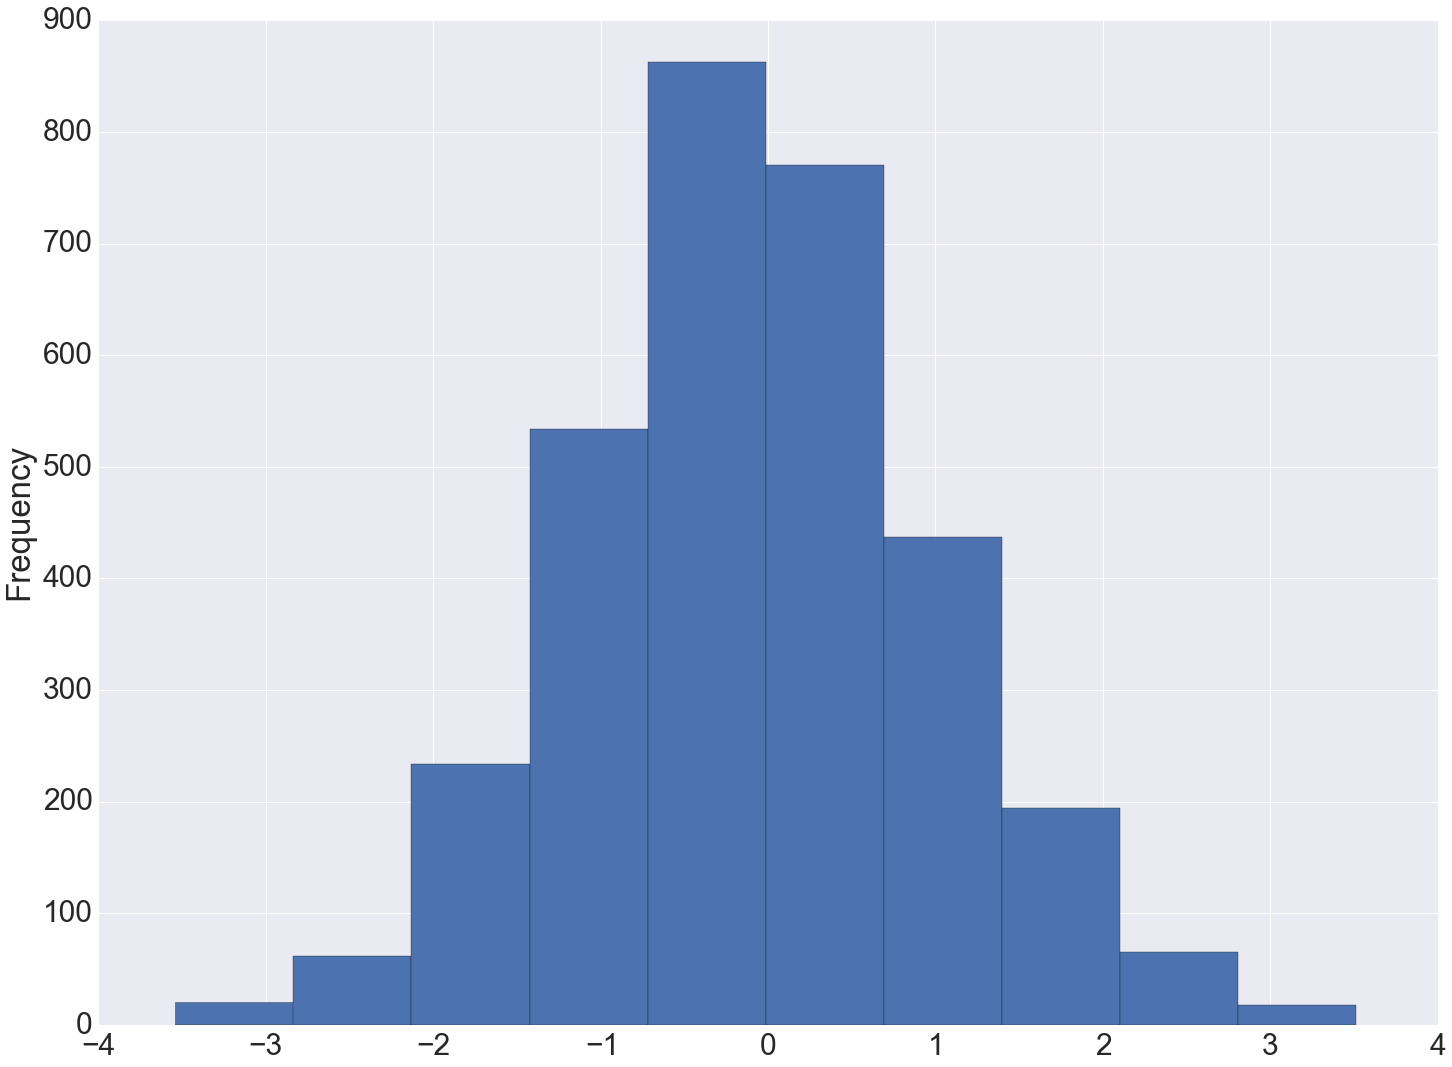

In [49]:
sig_slow.A.plot(kind='hist')

In [50]:
sig=pd.DataFrame()
sig['Fast']=sig_fast.A
sig['Slow']=sig_slow.A

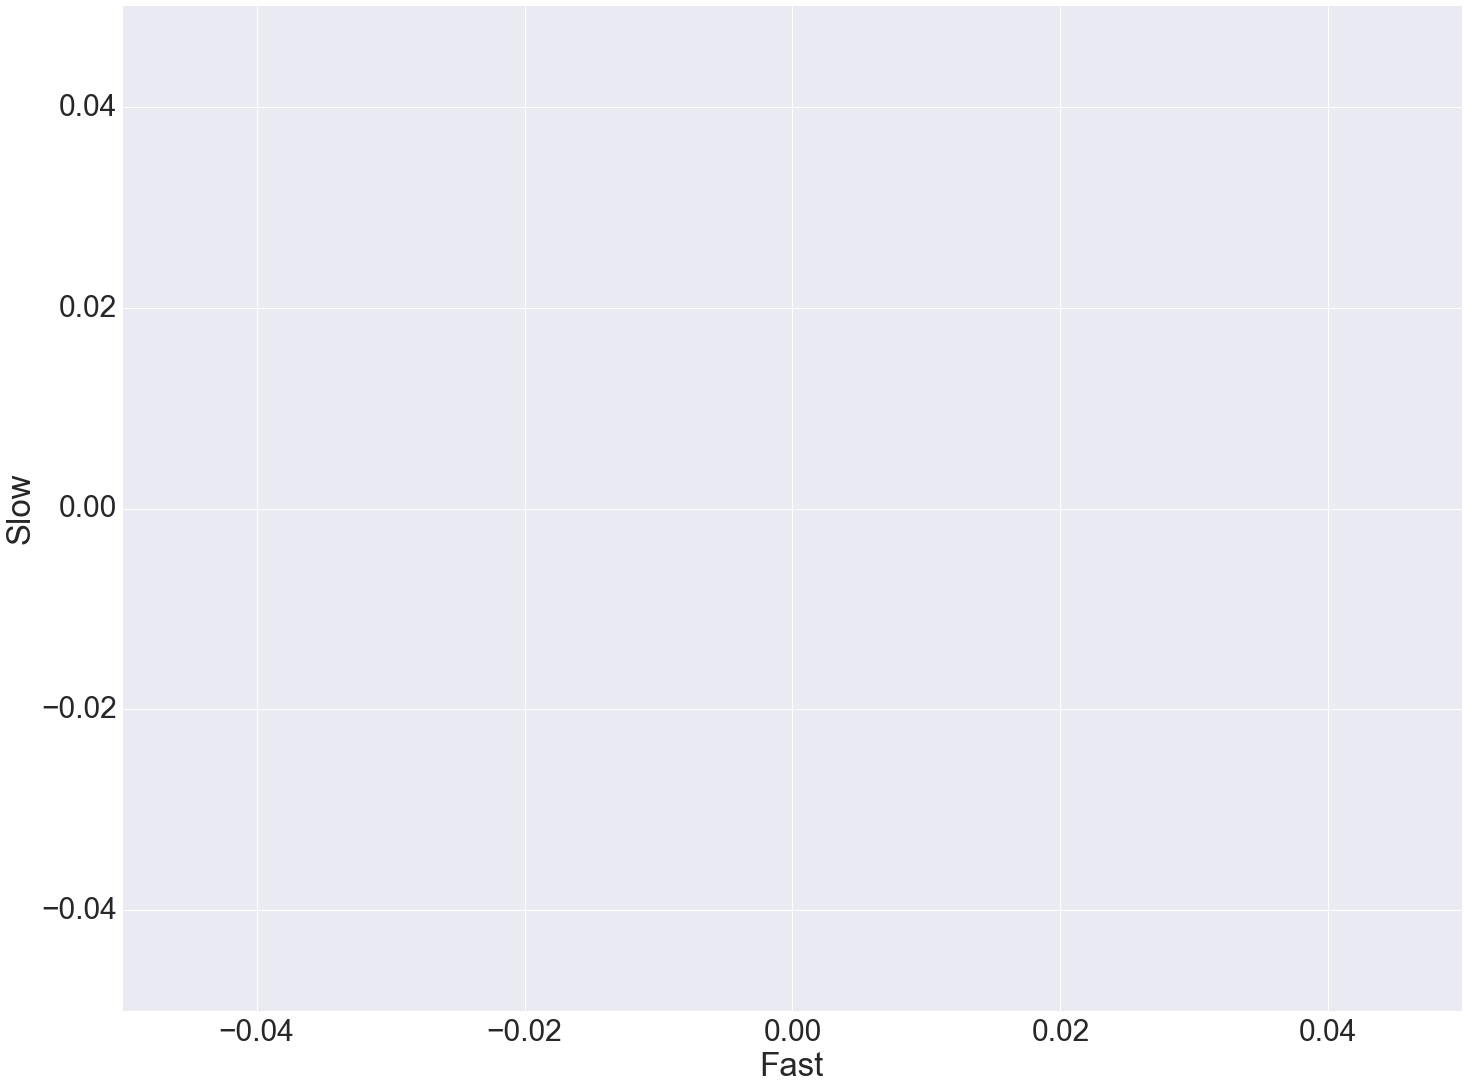

In [55]:
sns.kdeplot(data=sig.Fast,data2=sig.Slow,shade=True)

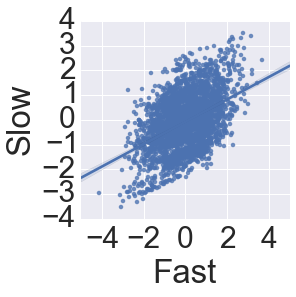

In [51]:
sns.lmplot(data=sig.dropna(),x='Fast',y='Slow')